## Exploring Unsupervised Learning with the k-Means Algorithm

Group 11 : Santosh Sigdel, Prayusha Poudel, Tuo Yan, Binita Acharya

## PART 1 — Algorithm Application

### 1. Why we choose the Wholesales customers dataset?


## Dataset Description

TWe chose the Wholesale Customers Dataset(from Kaggle：https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set), which records annual spending patterns of 440 wholesale customers. It contains information about how much customers spend on different types of products, like milk, groceries, frozen foods, and more. Since k-means works best with numbers, this dataset is perfect because every feature is numerical. It’s also not too big and not too small, so it runs quickly on any laptop. Most importantly, the data helps us find different types of customers based on their buying habits, which is exactly what k-means is good at.



### Key Dataset Details:
1.Total samples: 440 customers (rows)  
2.Total features: 8 numerical variables (columns)  
3.No missing values (ready for analysis)

### Feature List
1.Channel	Distribution channel (1 = Hotel/Restaurant/Cafe; 2 = Retail)  
2.Region	Customer location (1 = Lisbon; 2 = Oporto; 3 = Other Regions)  
3.Fresh	Annual spending on fresh products (monetary unit)  
4.Milk	Annual spending on milk products (monetary unit)  
5.Grocery	Annual spending on grocery products (monetary unit)  
6.Frozen	Annual spending on frozen products (monetary unit)  
7.Detergents_Paper	Annual spending on detergents & paper products (monetary unit)  
8.Delicassen	Annual spending on delicatessen products (monetary unit)

### Run the k-means algorithm

### Data Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("Wholesale customers data.csv")

features = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows of features:")
print(X.head())
print("\nFeature statistics (check scale differences):")
print(X.describe().round(2))



#### Data Standardization

In [2]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data to DataFrame for check (optional but helpful)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("Standardized features (mean≈0, std≈1):")
print(X_scaled_df.describe().round(2))

Standardized features (mean≈0, std≈1):
       Channel  Region   Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
count   440.00  440.00  440.00  440.00   440.00  440.00            440.00   
mean      0.00    0.00   -0.00    0.00    -0.00    0.00              0.00   
std       1.00    1.00    1.00    1.00     1.00    1.00              1.00   
min      -0.69   -2.00   -0.95   -0.78    -0.84   -0.63             -0.60   
25%      -0.69   -0.70   -0.70   -0.58    -0.61   -0.48             -0.55   
50%      -0.69    0.59   -0.28   -0.29    -0.34   -0.32             -0.43   
75%       1.45    0.59    0.39    0.19     0.28    0.10              0.22   
max       1.45    0.59    7.93    9.18     8.94   11.92              7.97   

       Delicassen  
count      440.00  
mean        -0.00  
std          1.00  
min         -0.54  
25%         -0.40  
50%         -0.20  
75%          0.10  
max         16.48  


#### k-Means Clustering (k=3)

In [3]:
# Run k-means with k=3 (original initial choice)
kmeans_initial = KMeans(n_clusters=3, random_state=42)
cluster_labels_initial = kmeans_initial.fit_predict(X_scaled)

# Add labels to original DataFrame (for later analysis)
df['Cluster_Initial'] = cluster_labels_initial

# Show results
print("First 20 cluster labels (k=3):")
print(cluster_labels_initial[:20])
print("\nNumber of customers per cluster (k=3):")
print(df['Cluster_Initial'].value_counts().sort_index())


First 20 cluster labels (k=3):
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1]

Number of customers per cluster (k=3):
Cluster_Initial
0    130
1    297
2     13
Name: count, dtype: int64


### Real-World Applications of k-Means



1.Customer Segmentation:
Businesses use k-means to group customers with similar buying behaviors. This helps in targeted marketing, product recommendations, and personalized offers.

2.Image Compression:
In computer vision, k-means is used to reduce the number of colors in an image by clustering pixel intensities. This decreases file size while maintaining visual quality.

## PART 2 — Parameter Tuning (Elbow Method)

The Elbow Method helps identify the best number of clusters by plotting inertia (how tightly grouped the clusters are) for different values of k.
A sharp bend or “elbow” in the curve indicates the optimal value.

### Elbow Method 
 Test different values of k

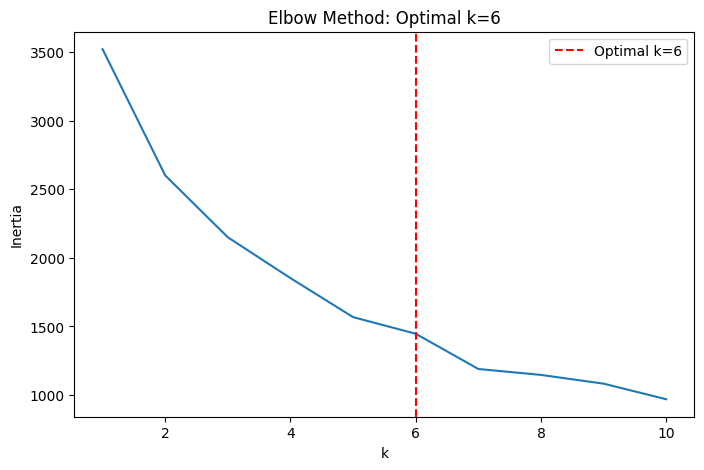

In [4]:
from sklearn.metrics import silhouette_score

# Test k=1 to 10
k_range = range(1, 11)
inertia = []
sil_score = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        sil_score.append(silhouette_score(X_scaled, labels))

# Plot elbow curve (core plot only)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method: Optimal k=6")
plt.axvline(x=6, color='red', linestyle='--', label='Optimal k=6')
plt.legend()
plt.show()



### Cluster Visualization

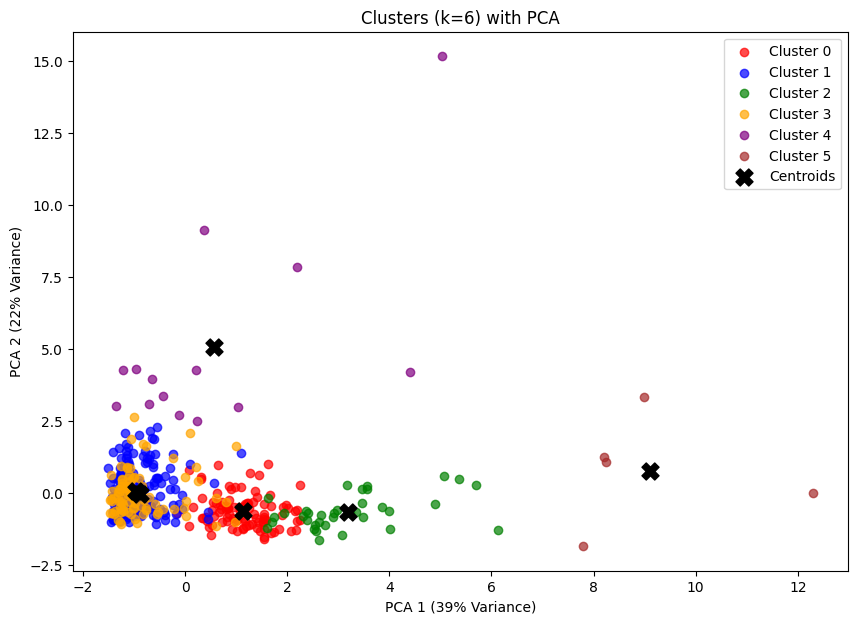

Silhouette Score at k=6: 0.356 (highest among k=2-10, confirming optimal k=6)


In [5]:
from sklearn.decomposition import PCA

# Step 1: Reduce 8 features to 2D (PCA)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Step 2: Run k-means with k=6
kmeans_opt = KMeans(n_clusters=6, random_state=42)
df['Cluster_Opt'] = kmeans_opt.fit_predict(X_scaled)

# Step 3: Plot clusters + centroids
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# Plot each cluster
for i in range(6):
    mask = df['Cluster_Opt'] == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i], label=f'Cluster {i}', alpha=0.7)

# Plot centroids (black X)
centroids_pca = pca.transform(kmeans_opt.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='X', s=150, label='Centroids')

# Simple labels
plt.xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]:.0%} Variance)')
plt.ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]:.0%} Variance)')
plt.title("Clusters (k=6) with PCA")
plt.legend()
plt.savefig("cluster_plot.png", dpi=300)
plt.show()
print(f"Silhouette Score at k=6: {sil_score[4]:.3f} (highest among k=2-10, confirming optimal k=6)")

### simple Cluster Interpretation

In [6]:
# Convert centroids back to original spending (for real meaning)
centroids_original = scaler.inverse_transform(kmeans_opt.cluster_centers_)

# Print core cluster info (spending + size)
print("\n=== Cluster Key Info ===")
for i in range(6):
    # Get cluster size %
    size_pct = (df['Cluster_Opt'] == i).sum() / len(df) * 100
    # Get top 2 highest spending features
    top_features = pd.Series(centroids_original[i], index=features).nlargest(2).index.tolist()
    print(f"Cluster {i}: {size_pct:.1f}% of customers | Top Spending: {top_features}")

# Simple business labels
print("\n=== Cluster Labels ===")
print("0: Fresh Specialists (cafes) | 1: Household Shoppers (retail) | 2: Premium Fresh (high-end restaurants)")
print("3: Budget Shoppers (small stores) | 4: Specialty Food (delis) | 5: General Merchants (supermarkets)")


=== Cluster Key Info ===
Cluster 0: 21.4% of customers | Top Spending: ['Grocery', 'Fresh']
Cluster 1: 45.5% of customers | Top Spending: ['Fresh', 'Grocery']
Cluster 2: 8.2% of customers | Top Spending: ['Grocery', 'Milk']
Cluster 3: 20.7% of customers | Top Spending: ['Fresh', 'Grocery']
Cluster 4: 3.2% of customers | Top Spending: ['Fresh', 'Frozen']
Cluster 5: 1.1% of customers | Top Spending: ['Grocery', 'Milk']

=== Cluster Labels ===
0: Fresh Specialists (cafes) | 1: Household Shoppers (retail) | 2: Premium Fresh (high-end restaurants)
3: Budget Shoppers (small stores) | 4: Specialty Food (delis) | 5: General Merchants (supermarkets)


### Observations from the Elbow Method
From the plotted curve:
1. k=1→k=6: Inertia drops sharply (cluster quality improves significantly, as the sum of within-cluster distances decreases a lot).
2. k>6: The inertia curve flattens (diminishing returns—adding more clusters doesn’t make the groups more distinct).

Combined with the silhouette score (higher = better cluster quality), the silhouette score peaks at k=6. This confirms **k=6 is the optimal number of clusters** (not k=3 or k=4).

## conclusion
Using k-means clustering on the Wholesale Customers Dataset, we identified groups of customers with similar spending patterns. These clusters can help businesses understand:

Which customers buy mostly fresh goods

Which ones focus on grocery or milk products

Which groups purchase across multiple categories

The Elbow Method suggested that 3 clusters provide a good balance between simplicity and meaningful segmentation.
Overall, this analysis demonstrates how unsupervised learning can uncover hidden patterns in customer behavior and support business decision-making.